![Question 1](Q5.png)

# Importing Dependencies

In [1]:
#Base imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Q1 imports
from sklearn.linear_model import LinearRegression

#Q2 imports
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA

#Q3 imports
from scipy.cluster.hierarchy import linkage, dendrogram

#Q4 imports
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

%matplotlib inline
sns.set()

## Load the Dataset

In [2]:
df = pd.read_csv("Datasets/Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
df = df[['YearsExperience', 'Salary']]
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


## Data Exploration

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None


No null values, ready to proceed

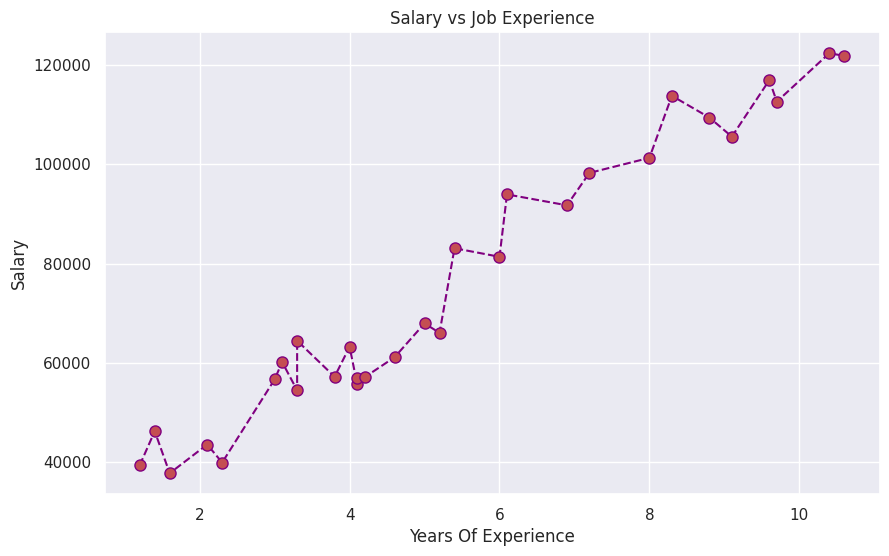

In [5]:
plt.figure(figsize = (10,6))
plt.plot(df.YearsExperience,df.Salary,marker = 'o',markersize = 8, mfc='r',c = 'purple',linestyle = '--')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.title("Salary vs Job Experience")
plt.show()

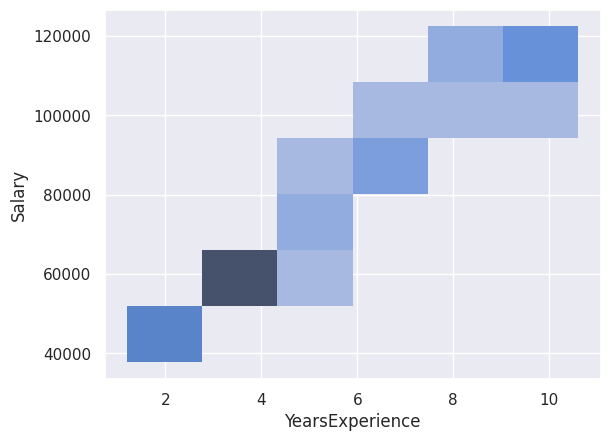

In [6]:
# checking out the ditribution
sns.histplot(df,y = 'Salary',x ='YearsExperience',kde = True)
plt.show()
#increasing plot

## Implementation

In [7]:
X = df['YearsExperience']
y = df['Salary']

Text(0.5, 1.0, 'Salary vs Job Experience')

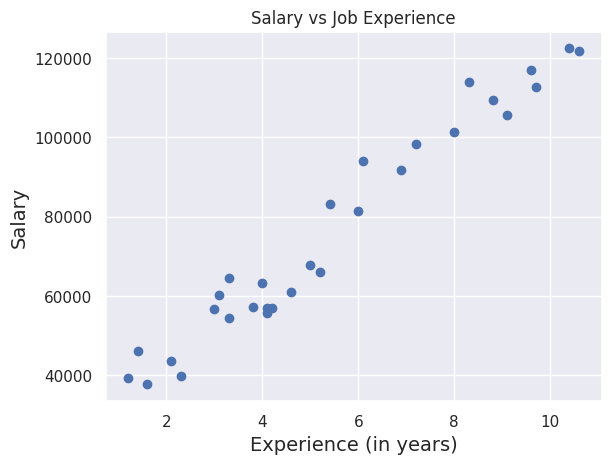

In [8]:
plt.scatter(X,y)
plt.xlabel('Experience (in years)', fontsize =14)
plt.ylabel('Salary', fontsize =14)
plt.title("Salary vs Job Experience")

Quick look at the regression line using seaborn, before we implement it mathematically

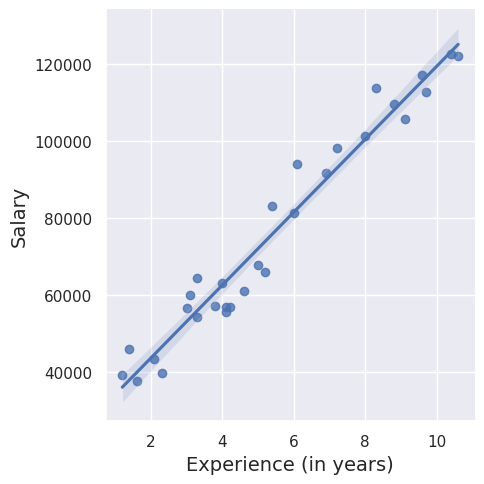

In [9]:
sns.lmplot(data = df,y = 'Salary',x ='YearsExperience',)
plt.xlabel('Experience (in years)', fontsize = 14)
plt.ylabel('Salary', fontsize = 14)
plt.show()

In [10]:
X.shape, y.shape

((30,), (30,))

In [11]:
type(X)

pandas.core.series.Series

### Transform the inputs into a matrix (2D object)

In [12]:
X = X.values.reshape(-1,1)
X.shape

(30, 1)

In [13]:
type(X)

numpy.ndarray

## Performing Linear Regression¶

In [14]:
reg = LinearRegression()

In [15]:
reg.fit(X,y)

LinearRegression()

In [16]:
#R2 score
reg.score(X,y)

0.9569566641435086

***R-squared value ~ 0.96, signifies that our model is good and can be used to make valid predictions.***

## Regression Line

Regression Co-efficient = 9449.96 
Regression Intercept = 24848.20




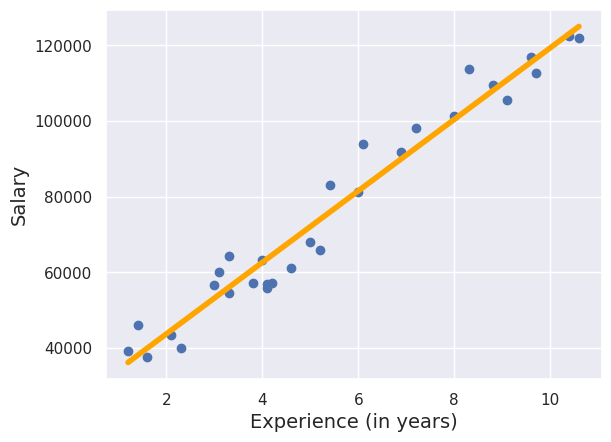

In [17]:
print(f"Regression Co-efficient = {reg.coef_[0]:.2f} \nRegression Intercept = {reg.intercept_:.2f}\n\n")

plt.scatter(X,y)
yhat = reg.coef_*X + reg.intercept_
fig = plt.plot(X,yhat, lw=4, c='orange', label ='regression line')
plt.xlabel('Experience (in years)', fontsize = 14)
plt.ylabel('Salary', fontsize = 14)
plt.show()

## Prediction

In [18]:
print(f"The predicted salary of an employee with experience of 9.9 years is : {reg.predict(np.array(9.9).reshape(-1,1))[0]:.2f}")

The predicted salary of an employee with experience of 9.9 years is : 118402.83


![Question 3](Q7.png)

# Load the dataset

In [19]:
wine_df=pd.read_csv('Datasets/wine-clustering.csv')
wine_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Exploring the Dataset

In [20]:
wine_df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [21]:
wine_df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Implementation

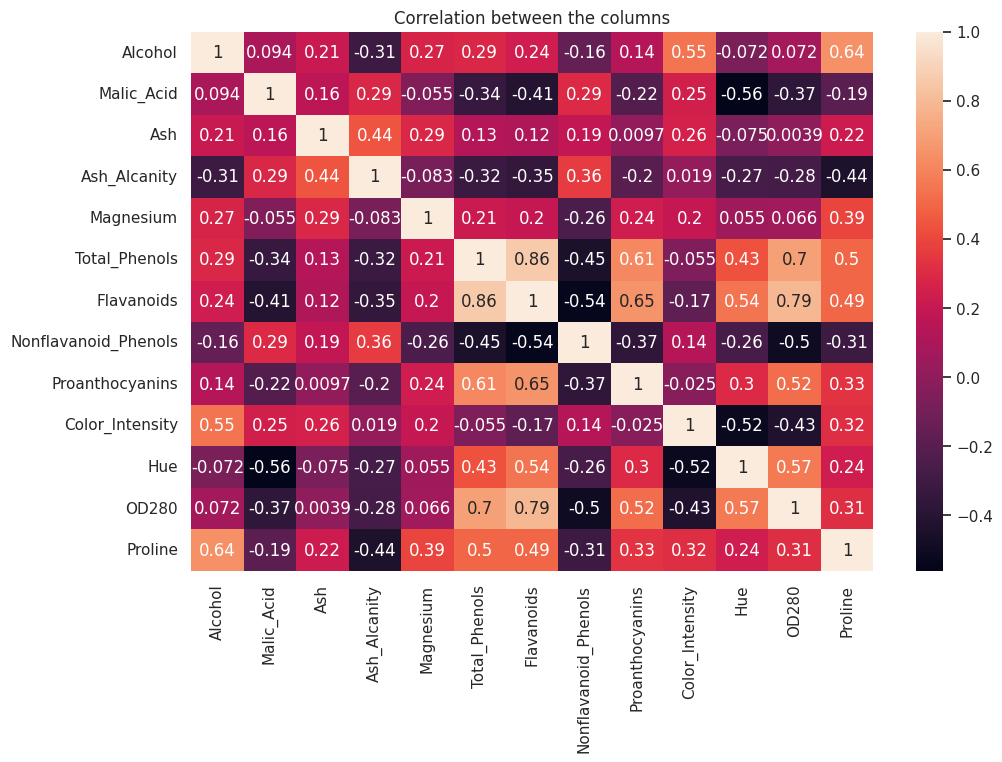

In [22]:
plt.figure(figsize=(11,7))
sns.heatmap(wine_df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [23]:
pca = PCA(n_components=2) #dimensionality reduction
X = pca.fit_transform(wine_df)

In [24]:
X.shape

(178, 2)

In [25]:
X[0]

array([318.56297929,  21.49213073])

### K-Means Clustering

In [26]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
unique_labels = np.unique(label)

/media/ritwiz/Code1/Jupyter-Workspace/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
unique_labels

array([0, 1, 2], dtype=int32)

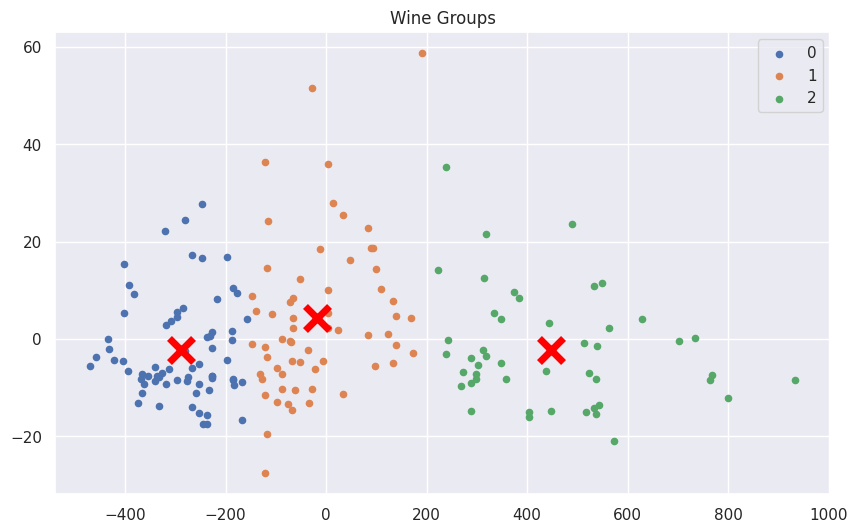

In [28]:
plt.figure(figsize=(10, 6))
for i in unique_labels:
    plt.scatter(X[label==i,0], X[label==i,1], label=i, s=20)

plt.scatter(x=centroids[:,0], y=centroids[:,1], marker="x", s=300, linewidths=5, color="red")
    
plt.legend()
plt.title('Wine Groups')
plt.show()

### K-Medoids Clustering

In [29]:
kmedoids = KMedoids(n_clusters=2)
label = kmedoids.fit_predict(X)
centroids = kmedoids.cluster_centers_
unique_labels = np.unique(label)

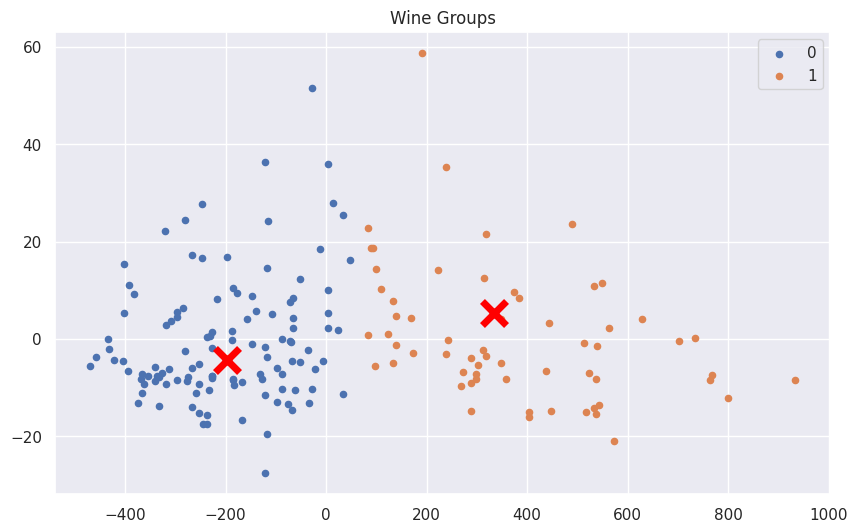

In [30]:
plt.figure(figsize=(10, 6))
for i in unique_labels:
    plt.scatter(X[label==i,0], X[label==i,1], label=i, s=20)

plt.scatter(x=centroids[:,0], y=centroids[:,1], marker="x", s=300, linewidths=5, color="red")
    
plt.legend()
plt.title('Wine Groups')
plt.show()

![Question 4](Q8.png)

# Dendograms

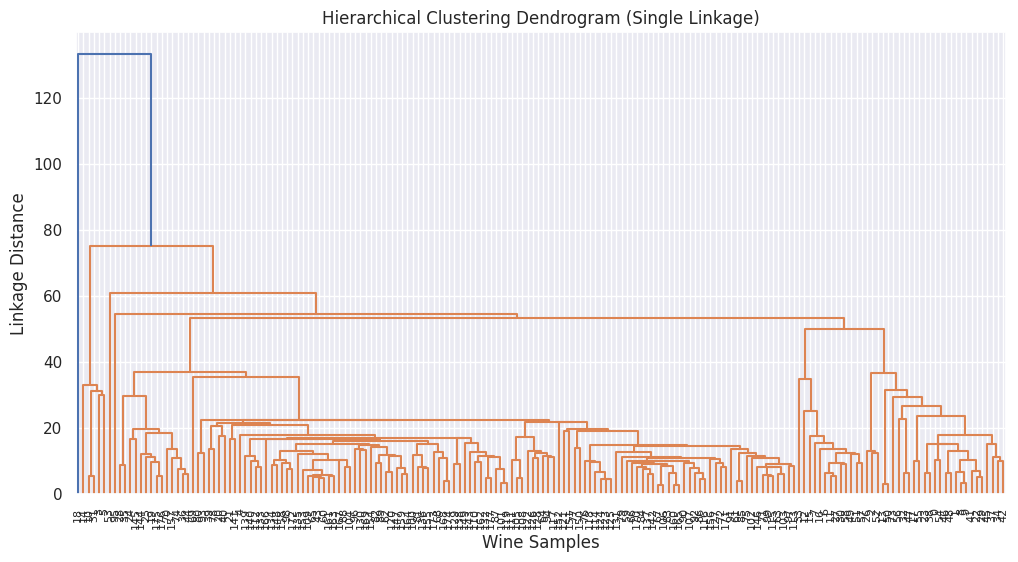

In [31]:
# Hierarchical clustering with single linkage
single_linkage = linkage(wine_df, method='single')
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)')
plt.ylabel('Linkage Distance')
plt.xlabel('Wine Samples')
dendrogram(single_linkage, leaf_rotation=90, leaf_font_size=8)
plt.show()

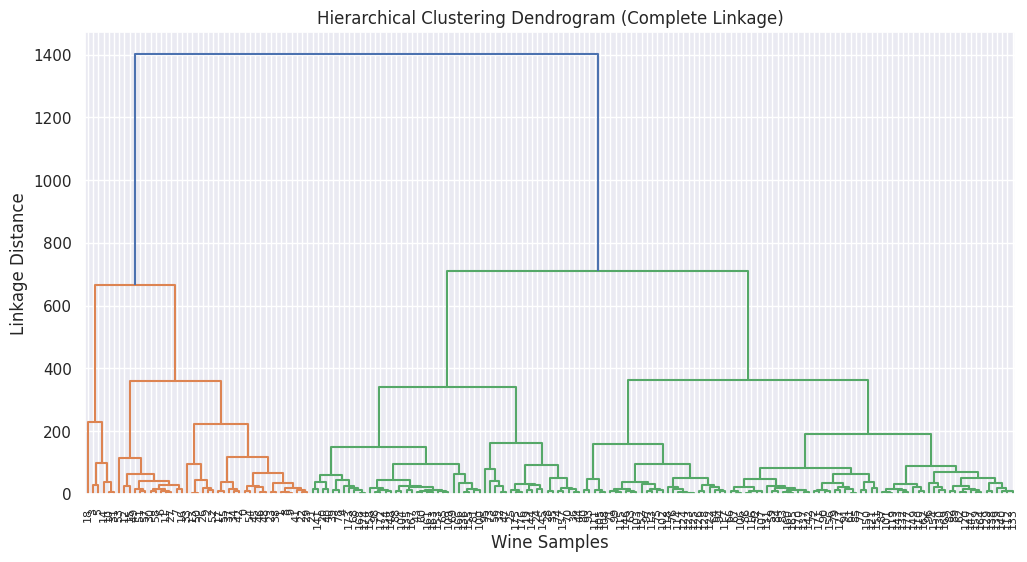

In [32]:
# Hierarchical clustering with complete linkage
complete_linkage = linkage(wine_df, method='complete')
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.ylabel('Linkage Distance')
plt.xlabel('Wine Samples')
dendrogram(complete_linkage, leaf_rotation=90, leaf_font_size=8)
plt.show()

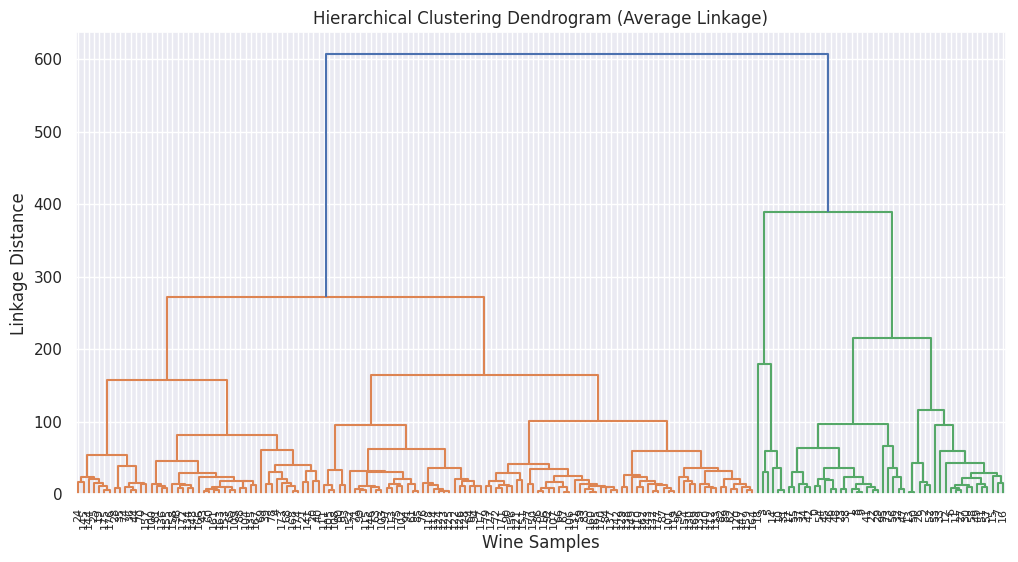

In [33]:
# Hierarchical clustering with average linkage
average_linkage = linkage(wine_df, method='average')
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.ylabel('Linkage Distance')
plt.xlabel('Wine Samples')
dendrogram(average_linkage, leaf_rotation=90, leaf_font_size=8)
plt.show()

![Question 2](Q6.png)

# Load the dataset

In [34]:
df = pd.read_csv('Datasets/heart_2020_cleaned.csv')
print(df.shape)
df.head()

(319795, 18)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Understanding the dataset columns

### Target 
* HeartDisease - Yes / No
  
### Features
* BMI - Normal weight (18.5 <= BMI < 25.0)
* Smoking - Have you smoked at least 100 cigarettes in your entire life (approx. 5 packs)?
* AlcoholDrinking - Do you have more than 14 drinks of alcohol (men) or more than 7 (women) in a week?
* Stroke - Did you have a stroke?
* PhysicalHealth - For how many days during the past 30 days was your physical health not good?
* MentalHealth - For how many days during the past 30 days was your mental health not good?
* DiffWalking - Do you have serious difficulty walking or climbing stairs?
* Sex
* AgeCategory
* Race
* Diabetic
* PhysicalActivity - Have you played any sports (running, biking, etc.) in the past month?
* GenHealth - How can you define your general health?
* SleepTime - How many hours on average do you sleep?
* Asthma
* KidneyDisease
* SkinCancer

## Exploratory Data Analysis

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [36]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

No null values found

In [37]:
df.duplicated().sum()

18078

In [38]:
df.drop_duplicates(inplace=True)

## Dealing with all categorical values in our df

In [39]:
cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [40]:
df.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0


<Axes: >

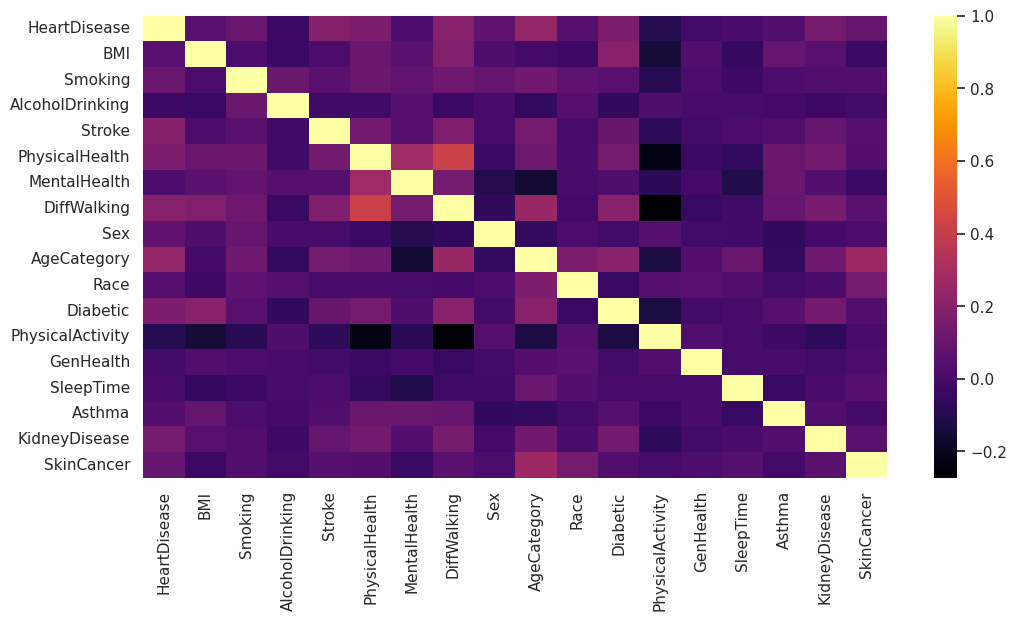

In [41]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=False, cmap='inferno')

 Since all the features can contribute towards the final decision, we are not dropping any of the features. If needed we can perform PCA to reach optimal state. 

## Implementation

In [42]:
X = df.drop(['HeartDisease'],axis = 1)

In [43]:
y = df['HeartDisease']

In [44]:
X.shape, y.shape

((301717, 17), (301717,))

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [46]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((241373, 17), (241373,), (60344, 17), (60344,))

<Axes: ylabel='count'>

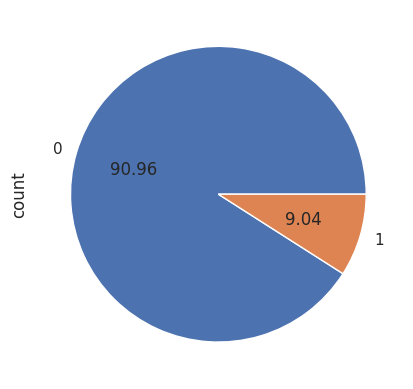

In [47]:
 y.value_counts().plot.pie(autopct = '%0.2f')

As evident from the pie chart above, the dataset is highly skewed, hence we need to perform sampling techniques in order to have a balanced dataset, on which we can train our logistic regression model. 

In [48]:
ROS = RandomOverSampler(sampling_strategy = 1)

In [49]:
X_mod_train, y_mod_train = ROS.fit_resample(X_train,y_train)

<Axes: ylabel='count'>

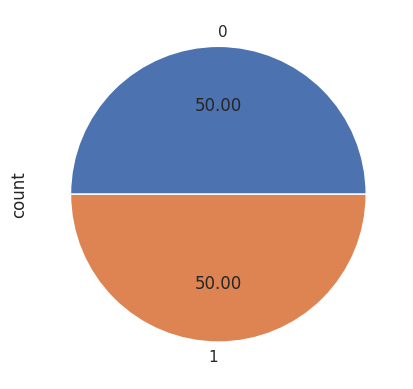

In [50]:
 y_mod_train.value_counts().plot.pie(autopct = '%0.2f')

In [51]:
X_mod_train.shape, y_mod_train.shape

((439124, 17), (439124,))

In [52]:
model = LogisticRegression()
model.fit(X_mod_train, y_mod_train)

/media/ritwiz/Code1/Jupyter-Workspace/myenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
# Make predictions on the test set
y_pred = model.predict(X_test)

## Metric Evaluation

In [54]:
# Calculate accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 0.73%


In [55]:
# Generate a classification report

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n\n", class_report)

Classification Report:

               precision    recall  f1-score   support

           0       0.97      0.73      0.83     54894
           1       0.22      0.75      0.34      5450

    accuracy                           0.73     60344
   macro avg       0.59      0.74      0.58     60344
weighted avg       0.90      0.73      0.79     60344



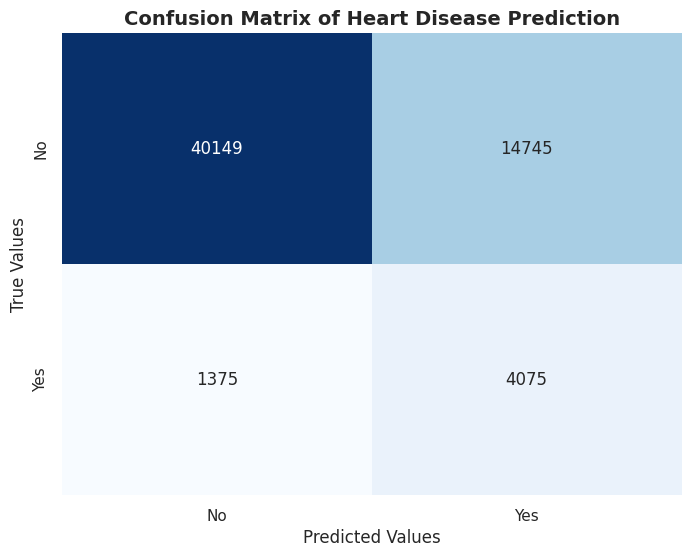

In [56]:
# Generate confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])

plt.title('Confusion Matrix of Heart Disease Prediction', fontsize=14, fontweight = 'bold')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

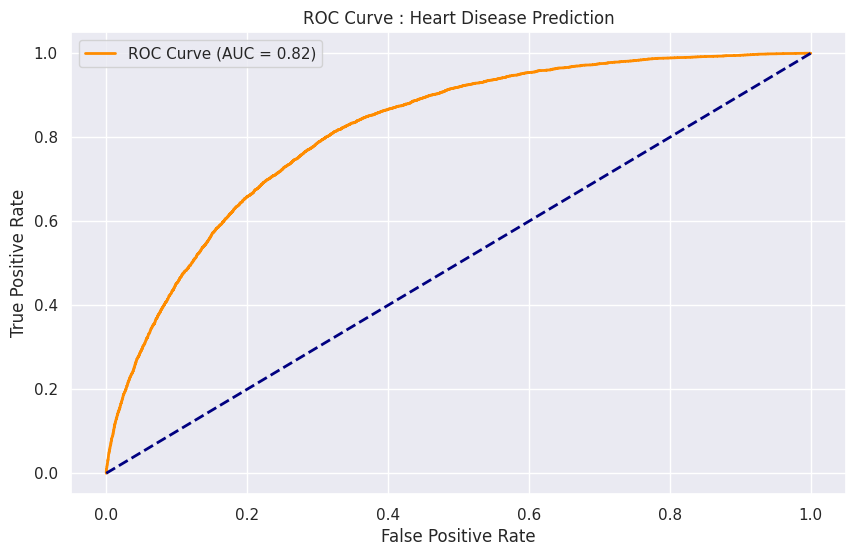

In [57]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve : Heart Disease Prediction')
plt.legend()
plt.show()

We get satisfactory results for the logistic classifier, hence not proceeding with PCA. 